# The Electric field at the antenna
To find the electric field within the HERA antenna the total distance that the signal has to travel from the source to the feed needs to be found first, a point *p* is chosen on the dish at co-ordinates $(x,y)$ and a point perpindicular to this point at the source with co-ordinates $(0,H_{f})$. The feed co-ordinates are given as $(0,h_{f})$, where $h_{f}$ is the height of the feed. $H_{f}$ is found using the far-field approximation $\frac{2D^{2}}{\lambda}$.

The distance from source to feed is given as $$ L=\sqrt{x^{2}+(y-h_{f})^{2}} + H_{f} - y $$ 
The distance *L* is used to find the phase $\phi$ $$ \phi = \frac{2\pi{L}}{\lambda} $$ The Electric Field at the feed is $$ dE=E_{0}e^{i\phi}ds $$

Where $ds$ is the path area on the antenna and is given by 
$$ds=dx\sqrt{1+\frac{x^{2}}{4h_{f}}}$$

The total Electric field at the feed of the antenna is given by $$ E_{Total}=\int_\frac{-D}{2}^\frac{D}{2} E_{0}e^{i\phi}ds$$ where *D* is the diameter of the antenna dish

The change in height due to the vertical and horizintal deviations was given as $$ \delta{h_{f}} = \sqrt{dx^{2}+(h_{f}-dy^{2})}$$

# With Theta
We also show how the Eletric field changes with angle $\theta$ here all equations used are the same,but now we want to show for different angles of $\theta$ where $\theta$ ranges $180^{o}$ from $-90^{o}$ to $90^{o}$.

Instead of a source perpindicular to the antenna, the observations are made from a plane wave at an angle $\theta$ to the normal. Using the co-ordinates $(sin\theta,cos\theta)$ on the pleane wave and the equation for the distance between a line and a point $$d = \frac{|{Ax+Bx+C}|}{\sqrt{A^{2}+B^{2}}}$$

The distance *d* now becomes $$ d=|x\sin\theta+y\cos\theta-H_{f}| $$

The total distance *L* from source to feed is now $$ L=\sqrt{x^{2}+(y-h_{f})^{2}} + |x\sin\theta+y\cos\theta-H_{f}| $$

The Total Electric field can then be espressed as $$ E_{Total}(h_{f},\lambda,D,dx,dy,\theta)=\int_\frac{-D}{2}^\frac{D}{2} E_{0}e^{i\phi(h_{f},\lambda,D,dx,dy,\theta)}\sqrt{1+\frac{x^{2}}{4h_{f}}}dx$$


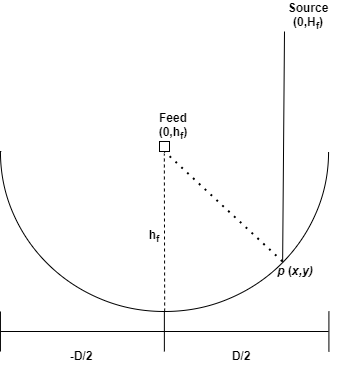 *Figure 1: A simple diagram of the HERA antenna showing the co-ordinates of the source at $(0,H_{f})$, a point p on the antenna dish at $(x,y)$ and the feed at  $(0,h_{f})$.*


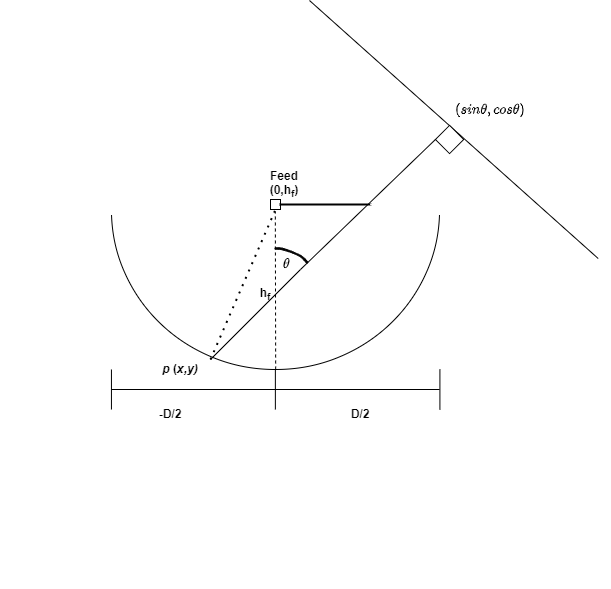 *Figure 2: A simple diagram of the HERA antenna showing the observation of a plane wave at co-ordinates $(sin\theta,cos\theta)$ where $\theta$ is the angle with respect to the normal*

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.integrate as integrate

In [34]:
#Functions of the equations
D = 14.    # Diameter of dish in meters
wavelen = 0.21 # 21 cm in meters Frequncy range 100MHz to 200MHz, make an array for lambda
e = math.e   # eulers number
dx = 0.
dy=0.
E0 = 1.
theta = (np.linspace(-np.deg2rad(90),np.deg2rad(90),200))

#Make y a function
h_feed = 4.48 #feed height in meters found from eq: focal length/diameter radio = 0.32 (HERA, DeBoer)

dfeed = lambda h_feed, dx,dy: np.sqrt((dx**2)+(h_feed-dy)**2) #Feed height with positional variation

H_far =lambda D, wavelen: (2*D**2)/wavelen  #Far field approximation
y = lambda x, h_feed,dx,dy: (x**2)/(4*dfeed(h_feed, dx,dy)) # y as a function of x (parabola)

In [35]:
L =  lambda x,h_feed,D,wavelen,dx,dy,theta: np.sqrt(x**2 + (y(x,h_feed,dx,dy)-dfeed(h_feed, dx,dy))**2) + abs(x*np.sin(theta)+y(x,h_feed,dx,dy)*np.cos(theta)-H_far(D,wavelen))

In [36]:
phi =lambda wavelen, h_feed,x,D,dx,dy,theta: (2*(np.pi)*(L(x,h_feed,D,wavelen,dx,dy,theta)/wavelen))

In [37]:
ds= lambda x,h_feed,dx,dy: np.sqrt(1+(x**2/((dfeed(h_feed, dx,dy))**2)*4))

In [38]:
dEreal = lambda x, h_feed,wavelen,D,dx,dy,theta: ds(x, h_feed,dx,dy)*(np.cos(phi(wavelen,h_feed,x,D,dx,dy,theta)))

In [39]:
dEimg = lambda x, h_feed,wavelen,D,dx,dy,theta: ds(x, h_feed,dx,dy)*(np.sin(phi(wavelen,h_feed,x,D,dx,dy,theta)))

In [40]:
Etotal_real =lambda  h_feed,wavelen,D,dx,dy,theta: integrate.quad(dEreal,-D/2,D/2, args=(dfeed(h_feed,dx,dy),wavelen,D,dx,dy,theta),limit=100)

Etotal_img = lambda h_feed,wavelen,D,dx,dy,theta: integrate.quad(dEimg,-D/2,D/2, args=(dfeed(h_feed,dx,dy),wavelen,D,dx,dy,theta),limit=100)

In [41]:
Etotal = np.zeros(np.shape(theta))
for i in range(theta.size):

    Etotal[i] = abs(Etotal_real( h_feed,wavelen,D,dx,dy,theta[i])[0]+1j*Etotal_img(h_feed,wavelen,D,dx,dy,theta[i])[0])

Emax = abs(Etotal_real( h_feed,wavelen,D,dx,dy,0)[0]+1j*Etotal_img(h_feed,wavelen,D,dx,dy,0)[0])  #E at maximum

**Original - no deviation**

Text(0, 0.5, '$2\\log_{10}{\\frac{E_{total}}{E_{max}}} \\:\\: (dB)$')

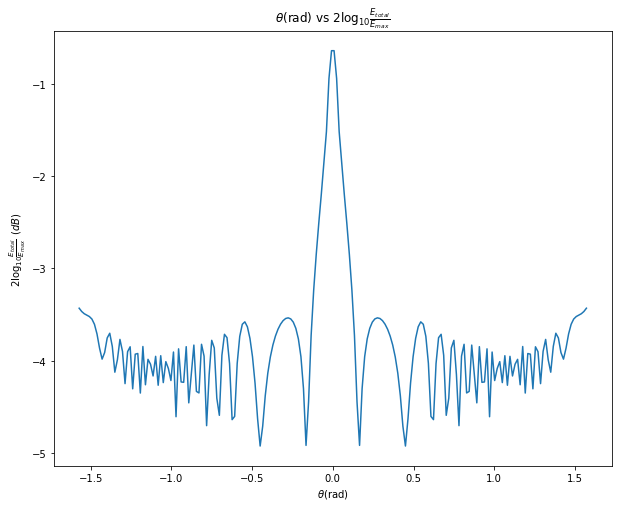

In [42]:
plt.figure(figsize=(10,8))
plt.plot(theta,2*np.log10(Etotal/Emax))
plt.title('$\\theta$(rad) vs $2\log_{10}{\\frac{E_{total}}{E_{max}}}$')
plt.xlabel('$\\theta$(rad)')
plt.ylabel('$2\log_{10}{\\frac{E_{total}}{E_{max}}} \:\: (dB)$')
#plt.savefig('theta_Etotal.jpg')


*Graph 1*:The power of the main beam is proportional to the Electric Field squared, as $P\:\:\alpha\:\:(\frac{E_{total}}{E_{max}})^{2}$, where the Electric field $E_{total}$ is normalized by dividing by the electric field at the maximum $E_{max}$. The Electric field is potted as $log_{10}$ to better visualise the results of the experiment, and to more accurately see the effect of the deviations.

**Deviation of 0.01 m in y-direction**

In [43]:
Etotal_dy = np.zeros(np.shape(theta))
for i in range(theta.size):
    Etotal_dy[i] = abs(Etotal_real( h_feed,wavelen,D,dx,0.01,theta[i])[0]+1j*Etotal_img(h_feed,wavelen,D,dx,0.01,theta[i])[0])
    
Emax_dy = abs(Etotal_real( h_feed,wavelen,D,dx,0.01,0)[0]+1j*Etotal_img(h_feed,wavelen,D,dx,0.01,0)[0])   

# plt.figure(figsize=(10,8))
# plt.plot(theta,2*np.log10(Etotal_dy/Emax_dy))
# plt.title("$\\theta$(rad) vs $2\log_{10}{\\frac{E_{total}}{E_{max}}}$ with dy = 0.01 m")
# plt.xlabel('$\\theta$(rad)')
# plt.ylabel('$2\log_{10}{\\frac{E_{total}}{E_{max}}}$  (dB)')
# #plt.savefig('theta_Etotal_dy.jpg')

# percentage_err = abs(((Etotal[i]-Etotal_dy[i])/Etotal[i])*100)
# print(percentage_err,'% diff at 0.01 m')

**Deviation of -0.01 m in y-direction**

In [44]:
Etotal_dt = np.zeros(np.shape(theta))
for i in range(theta.size):
    Etotal_dt[i] = abs(Etotal_real( h_feed,wavelen,D,dx,-0.01,theta[i])[0]+1j*Etotal_img(h_feed,wavelen,D,dx,-0.01,theta[i])[0])
    
Emax_dt = abs(Etotal_real( h_feed,wavelen,D,dx,-0.01,0)[0]+1j*Etotal_img(h_feed,wavelen,D,dx,-0.01,0)[0])   

# plt.figure(figsize=(10,8))
# plt.plot(theta,2*np.log10(Etotal_dt/Emax_dt))
# plt.title("$\\theta$(rad) vs $2\log_{10}{\\frac{E_{total}}{E_{max}}}$ with dy = -0.01 m")
# plt.xlabel('$\\theta$(rad)')
# plt.ylabel('$2\log_{10}{\\frac{E_{total}}{E_{max}}} (dB)$')
# #plt.savefig('theta_Etotal_dt.jpg')
# percentage_errt2 = abs(((Etotal[i]-Etotal_dt[i])/Etotal[i])*100)
# print(percentage_errt2, '% diff at -0.01 m')

**Deviation of -0.05 m in y-direction**

In [45]:
Etotal_dt1 = np.zeros(np.shape(theta))
for i in range(theta.size):
    Etotal_dt1[i] = abs(Etotal_real( h_feed,wavelen,D,dx,-0.05,theta[i])[0]+1j*Etotal_img(h_feed,wavelen,D,dx,-0.05,theta[i])[0])
    
Emax_dt1 = abs(Etotal_real( h_feed,wavelen,D,dx,-0.05,0)[0]+1j*Etotal_img(h_feed,wavelen,D,dx,-0.05,0)[0])   

percentage_errt = abs(((Etotal[i]-Etotal_dt1[i])/Etotal[i])*100)
print(percentage_errt,'% diff at-0.05 m')
# plt.figure(figsize=(10,8))
# plt.plot(theta,2*np.log10(Etotal_dt1/Emax_dt1))
# plt.title("$\\theta$(rad) vs $2\log_{10}{\\frac{E_{total}}{E_{max}}}$ with dy = -0.05 m")
# plt.xlabel('$\\theta$(rad)')
# plt.ylabel('$2\log_{10}{\\frac{E_{total}}{E_{max}}} (dB)$')
# #plt.savefig('theta_Etotal_dy.jpg')

8.126522431267954 % diff at-0.05 m


**Deviation of -0.1 m in y-direction**

In [46]:
Etotal_dt2 = np.zeros(np.shape(theta))
for i in range(theta.size):
    Etotal_dt2[i] = abs(Etotal_real( h_feed,wavelen,D,dx,-0.1,theta[i])[0]+1j*Etotal_img(h_feed,wavelen,D,dx,-0.1,theta[i])[0])
    
Emax_dt2 = abs(Etotal_real( h_feed,wavelen,D,dx,-0.1,0)[0]+1j*Etotal_img(h_feed,wavelen,D,dx,-0.1,0)[0])   


# plt.figure(figsize=(10,8))
# plt.plot(theta,2*np.log10(Etotal_dt2/Emax_dt2))
# plt.title("$\\theta$(rad) vs $E_{total}$ with dy = -0.1 m")
# plt.xlabel('$\\theta$(rad)')
# plt.ylabel('$E_{total}$')
# #plt.savefig('theta_Etotal_dy.jpg')
# percentage_errt1 = abs(((Etotal[i]-Etotal_dt2[i])/Etotal[i])*100)
# #print(percentage_errt1,'% diff at-0.1 m')

**All negative deviation compared to Original**

1.7435690939118615 % diff at -0.01 m
8.126522431267954 % diff at-0.05 m
14.974276240945821 % diff at-0.1 m


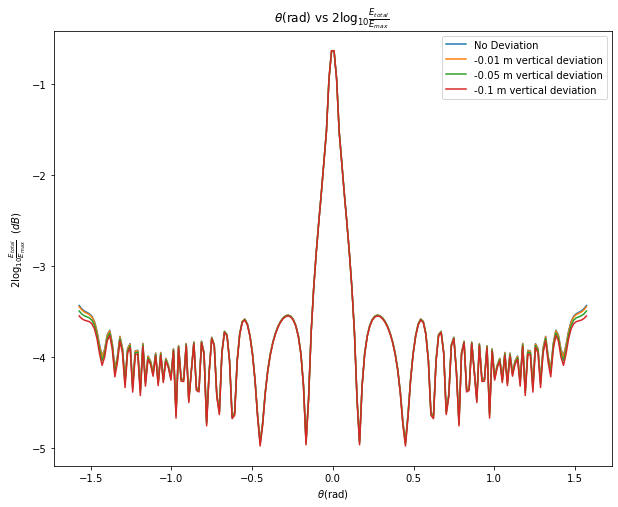

In [47]:
plt.figure(figsize=(10,8))     #plot of all neg dev
plt.plot(theta,2*np.log10(Etotal/Emax), label = 'No Deviation')
plt.plot(theta,2*np.log10(Etotal_dt/Emax_dt),label = '-0.01 m vertical deviation')
plt.plot(theta,2*np.log10(Etotal_dt1/Emax_dt1),label ='-0.05 m vertical deviation')
plt.plot(theta,2*np.log10(Etotal_dt2/Emax_dt2),label ='-0.1 m vertical deviation')
plt.title("$\\theta$(rad) vs $2\log_{10}{\\frac{E_{total}}{E_{max}}}$ ")
plt.xlabel('$\\theta$(rad)')
plt.ylabel('$2\log_{10}{\\frac{E_{total}}{E_{max}}} \:\:\:(dB)$')
plt.legend()
#plt.savefig('theta_Etotal_dt_allV2.jpg')

percentage_errt2 = abs(((Etotal[i]-Etotal_dt[i])/Etotal[i])*100)
print(percentage_errt2, '% diff at -0.01 m')
percentage_errt = abs(((Etotal[i]-Etotal_dt1[i])/Etotal[i])*100)
print(percentage_errt,'% diff at-0.05 m')
percentage_errt1 = abs(((Etotal[i]-Etotal_dt2[i])/Etotal[i])*100)
print(percentage_errt1,'% diff at-0.1 m')


*Graph 2:* This graph shows the results of the negative vertical deviations up to 0.1 m overplotted with each other and with the orignal graph with no deviation.

In [48]:
Etotal_dy2 = np.zeros(np.shape(theta))
for i in range(theta.size):
    Etotal_dy2[i] = abs(Etotal_real( h_feed,wavelen,D,dx,0.04,theta[i])[0]+1j*Etotal_img(h_feed,wavelen,D,dx,0.04,theta[i])[0])
    
Emax_dy2 = abs(Etotal_real( h_feed,wavelen,D,dx,0.04,0)[0]+1j*Etotal_img(h_feed,wavelen,D,dx,0.04,0)[0])   

In [49]:
percentage_err2 = abs(((Etotal[i]-Etotal_dy2[i])/Etotal[i])*100)
print(percentage_err2,'% diff at 0.04m')

7.664895328035211 % diff at 0.04m


In [50]:
Etotal_dy3 = np.zeros(np.shape(theta))
for i in range(theta.size):
    Etotal_dy3[i] = abs(Etotal_real( h_feed,wavelen,D,dx,0.08,theta[i])[0]+1j*Etotal_img(h_feed,wavelen,D,dx,0.08,theta[i])[0])
    
Emax_dy3 = abs(Etotal_real( h_feed,wavelen,D,dx,0.08,0)[0]+1j*Etotal_img(h_feed,wavelen,D,dx,0.08,0)[0])   

In [51]:
percentage_err3 = abs(((Etotal[i]-Etotal_dy3[i])/Etotal[i])*100)
print(percentage_err3,'% diff at 0.08 m')

16.63125492908089 % diff at 0.08 m


In [52]:
Etotal_dy4 = np.zeros(np.shape(theta))
for i in range(theta.size):
    Etotal_dy4[i] = abs(Etotal_real( h_feed,wavelen,D,dx,0.1,theta[i])[0]+1j*Etotal_img(h_feed,wavelen,D,dx,0.1,theta[i])[0])
    
Emax_dy4 = abs(Etotal_real( h_feed,wavelen,D,dx,0.1,0)[0]+1j*Etotal_img(h_feed,wavelen,D,dx,0.1,0)[0])   


In [53]:
percentage_err4 = abs(((Etotal[i]-Etotal_dy4[i])/Etotal[i])*100)
print(percentage_err4,'% diff at 0.1 m')

21.700891159814738 % diff at 0.1 m


In [54]:
Etotal_dy5 = np.zeros(np.shape(theta))
for i in range(theta.size):
    Etotal_dy5[i] = abs(Etotal_real( h_feed,wavelen,D,dx,0.2,theta[i])[0]+1j*Etotal_img(h_feed,wavelen,D,dx,0.2,theta[i])[0])
    
Emax_dy5 = abs(Etotal_real( h_feed,wavelen,D,dx,0.2,0)[0]+1j*Etotal_img(h_feed,wavelen,D,dx,0.2,0)[0])   


In [55]:
percentage_err5 = abs(((Etotal[i]-Etotal_dy5[i])/Etotal[i])*100)
print(percentage_err5,'% diff at 0.2 m')

55.15476800928168 % diff at 0.2 m


**All positive deviations compared to Original up to deviations of 0.2 m**

1.8089966568308877 % diff at 0.01 m
7.664895328035211 % diff at 0.04m
16.63125492908089 % diff at 0.08 m
21.700891159814738 % diff at 0.1 m
55.15476800928168 % diff at 0.2 m


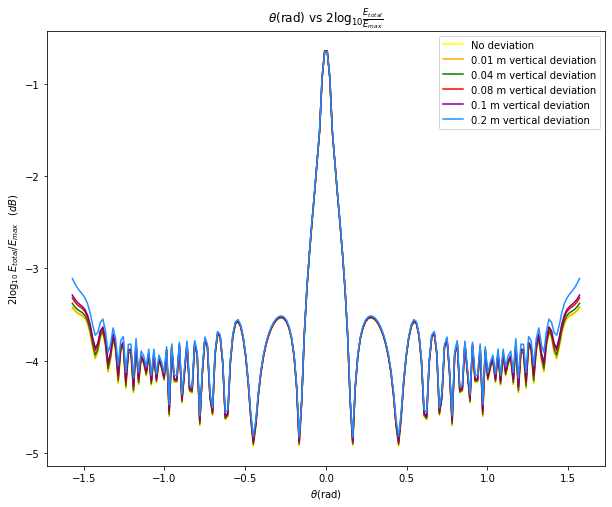

In [56]:
plt.figure(figsize=(10,8))
plt.plot(theta,2*np.log10(Etotal/Emax), label = 'No deviation', color = 'yellow')
plt.plot(theta,2*np.log10(Etotal_dy/Emax_dy),  label = '0.01 m vertical deviation', color ='orange')
plt.plot(theta,2*np.log10(Etotal_dy2/Emax_dy2),label = '0.04 m vertical deviation', color ='green')
plt.plot(theta,2*np.log10(Etotal_dy3/Emax_dy3),label = '0.08 m vertical deviation', color ='red')
plt.plot(theta,2*np.log10(Etotal_dy4/Emax_dy4),label = '0.1 m vertical deviation', color ='purple')
plt.plot(theta,2*np.log10(Etotal_dy5/Emax_dy5),label = '0.2 m vertical deviation', color ='dodgerblue')
plt.title('$\\theta$(rad) vs $2\log_{10}{\\frac{E_{total}}{E_{max}}}$')
plt.xlabel('$\\theta$(rad)')
plt.ylabel('$2\log_{10}\:{E_{total}/E_{max}} \:\:\:\:(dB)$')
plt.legend()

percentage_err = abs(((Etotal[i]-Etotal_dy[i])/Etotal[i])*100)
print(percentage_err,'% diff at 0.01 m')
percentage_err2 = abs(((Etotal[i]-Etotal_dy2[i])/Etotal[i])*100)
print(percentage_err2,'% diff at 0.04m')
percentage_err3 = abs(((Etotal[i]-Etotal_dy3[i])/Etotal[i])*100)
print(percentage_err3,'% diff at 0.08 m')
percentage_err4 = abs(((Etotal[i]-Etotal_dy4[i])/Etotal[i])*100)
print(percentage_err4,'% diff at 0.1 m')
percentage_err5 = abs(((Etotal[i]-Etotal_dy5[i])/Etotal[i])*100)
print(percentage_err5,'% diff at 0.2 m')


#plt.savefig('theta_Etotal_dy_all.jpg')

*Graph 3*: Graph 3 shows the Electric field as a function of $\theta$ with vertical deviations from 0.01 m to 0.2 m overplotted with each other as a comparison to the original where there is no deviation of the feed being observed.

In [57]:
Etotal_dy6 = np.zeros(np.shape(theta))
for i in range(theta.size):
    Etotal_dy6[i] = abs(Etotal_real( h_feed,wavelen,D,dx,0.4,theta[i])[0]+1j*Etotal_img(h_feed,wavelen,D,dx,0.4,theta[i])[0])
    
Emax_dy6 = abs(Etotal_real( h_feed,wavelen,D,dx,0.4,0)[0]+1j*Etotal_img(h_feed,wavelen,D,dx,0.4,0)[0])   

In [58]:
percentage_err_dy6 = abs(((Etotal[i]-Etotal_dy6[i])/Etotal[i])*100)
print(percentage_err_dy6,'% diff at 0.4 m')

207.19686196213706 % diff at 0.4 m


In [59]:
Etotal_dx = np.zeros(np.shape(theta))
for i in range(theta.size):
    Etotal_dx[i] = abs(Etotal_real( h_feed,wavelen,D,0.1,dy,theta[i])[0]+1j*Etotal_img(h_feed,wavelen,D,0.1,dy,theta[i])[0])
    
Emax_dx = abs(Etotal_real( h_feed,wavelen,D,0.1,dy,0)[0]+1j*Etotal_img(h_feed,wavelen,D,0.1,dy,0)[0])   

In [66]:
percentage_err_dx = abs(((Etotal[i]-Etotal_dx[i])/Etotal[i])*100)
print(percentage_err_dx)

0.15554708928942185


**Horizontal deviation up to 0.1 m compared to Original**

0.15554708928942185 % diff 0.1m 


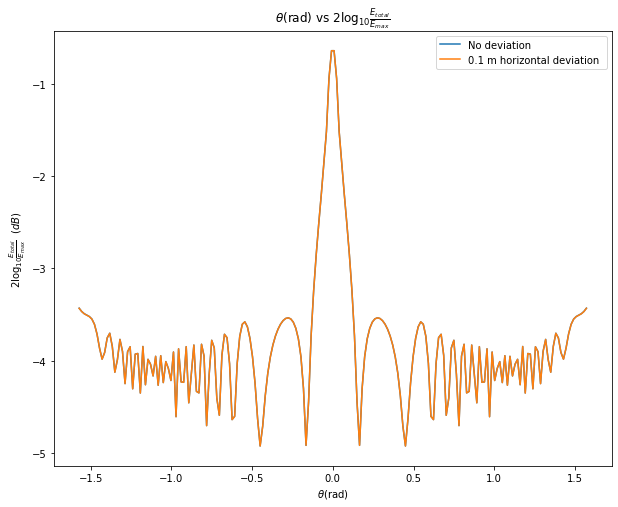

In [67]:
plt.figure(figsize=(10,8))
plt.plot(theta,2*np.log10(Etotal/Emax), label = 'No deviation')
plt.plot(theta,2*np.log10(Etotal_dx/Emax_dx), label = '0.1 m horizontal deviation ')
plt.title("$\\theta$(rad) vs $2\log_{10}{\\frac{E_{total}}{E_{max}}}$")
plt.xlabel('$\\theta$(rad)')
plt.ylabel('$2\log_{10}{\\frac{E_{total}}{E_{max}}} \:\:\:(dB)$')
plt.legend()

percentage_err_dx = abs(((Etotal[i]-Etotal_dx[i])/Etotal[i])*100)
print(percentage_err_dx,'% diff 0.1m ')
#plt.savefig('theta_Etotal_dx_all.jpg')

*Graph 4*: This graph shows the original power spectrum overplotted with the power spectrum with a horizontal deviation of 0.1 m. There is very little change in the Electric Field for any horzontal deviation. This difference when expressed as a percentage was found to be a 0.156 % difference. 

**Electric field at maximum for horizontal change up to 0.1 m in positive and negative direction**

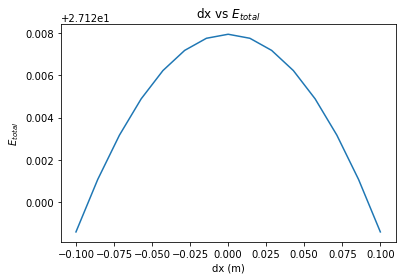

In [62]:
dx=np.linspace(-0.1,0.1,15) 
Etotaldx = np.zeros(dx.size)
for i in range(dx.size):
    Etotaldx[i] = abs(Etotal_real( h_feed,wavelen,D,dx[i],0,0)[0]+1j*Etotal_img(h_feed,wavelen,D,dx[i],0,0)[0])

plt.plot(dx,Etotaldx)
plt.xlabel('dx (m)')
plt.ylabel('$E_{total}\:\:$')
plt.title('dx vs $E_{total}$ ')
plt.savefig('dx_vs_E_totalV2.jpg')

*Graph 5*: This graph shows the effect the change in position has on the electric field at a maximum for horizontal deviations up to 0.1 m in the positive and negative directions. As shown on the graph, the change in the Electric field is very small in the x-direction, which also corresponds to the information shown in Graph 4.

**Electric field at maximum for vertical change up to 0.1 m in positive and negative direction**

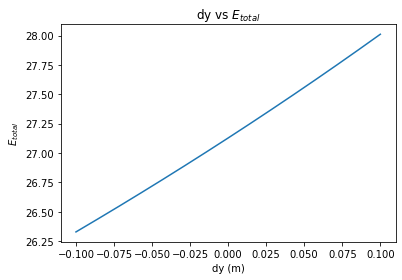

In [63]:
dy=np.linspace(-0.1,0.1,15) 
Etotaldy = np.zeros(dy.size)
for i in range(dy.size):
    Etotaldy[i] = abs(Etotal_real( h_feed,wavelen,D,0,dy[i],0)[0]+1j*Etotal_img(h_feed,wavelen,D,0,dy[i],0)[0])
plt.plot(dy,Etotaldy)
plt.xlabel('dy (m)')
plt.ylabel('$E_{total}\:\:$')
plt.title('dy vs $E_{total}$ ')
plt.savefig('dy_vs_E_totalV2.jpg')

*Graph 5*: This graph shows the effect the change in position has on the electric field at a maximum for verical deviations up to 0.1 m in the positive and negative direction. This graph shows a much greater change that the Electric field experiences as a result of vertical changes in height, these results also correspond to the results shown in Graphs 2 and 3.

**Percentage difference of deviations compared to Original**

In [65]:
percentage_errt2 = abs(((Etotal[i]-Etotal_dt[i])/Etotal[i])*100)
print(percentage_errt2, '% diff at -0.01 m')
percentage_errt = abs(((Etotal[i]-Etotal_dt1[i])/Etotal[i])*100)
print(percentage_errt,'% diff at-0.05 m')
percentage_errt1 = abs(((Etotal[i]-Etotal_dt2[i])/Etotal[i])*100)
print(percentage_errt1,'% diff at-0.1 m')
percentage_err2 = abs(((Etotal[i]-Etotal_dy2[i])/Etotal[i])*100)
print(percentage_err2,'% diff at 0.04m')
percentage_err3 = abs(((Etotal[i]-Etotal_dy3[i])/Etotal[i])*100)
print(percentage_err3,'% diff at 0.08 m')
percentage_err4 = abs(((Etotal[i]-Etotal_dy4[i])/Etotal[i])*100)
print(percentage_err4,'% diff at 0.1 m')
percentage_err5 = abs(((Etotal[i]-Etotal_dy5[i])/Etotal[i])*100)
print(percentage_err5,'% diff at 0.2 m')
percentage_err_dy6 = abs(((Etotal[i]-Etotal_dy6[i])/Etotal[i])*100)
print(percentage_err_dy6,'% diff at 0.4 m')
percentage_err_dx = abs(((Etotal[i]-Etotal_dx[i])/Etotal[i])*100)
print(percentage_err_dx,'% diff 0.1m x-dir')
percentage_err = abs(((Etotal[i]-Etotal_dy[i])/Etotal[i])*100)
print(percentage_err,'% diff at 0.01 m')

1.3789710971622617 % diff at -0.01 m
6.5739864684874405 % diff at-0.05 m
12.422415695812166 % diff at-0.1 m
5.87264482904284 % diff at 0.04m
12.38309821215303 % diff at 0.08 m
15.909442045528813 % diff at 0.1 m
36.91665303802713 % diff at 0.2 m
107.44914636616024 % diff at 0.4 m
0.15554708928942185 % diff 0.1m x-dir
1.4133662430160343 % diff at 0.01 m
